In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report

In [2]:
file_path = 'archive (2)/data/train'

In [3]:
name_class = os.listdir(file_path)
name_class

['benign', 'malignant']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths

['archive (2)/data/train\\benign\\100.jpg',
 'archive (2)/data/train\\benign\\1000.jpg',
 'archive (2)/data/train\\benign\\1001.jpg',
 'archive (2)/data/train\\benign\\1002.jpg',
 'archive (2)/data/train\\benign\\1004.jpg',
 'archive (2)/data/train\\benign\\1005.jpg',
 'archive (2)/data/train\\benign\\1007.jpg',
 'archive (2)/data/train\\benign\\1008.jpg',
 'archive (2)/data/train\\benign\\1009.jpg',
 'archive (2)/data/train\\benign\\101.jpg',
 'archive (2)/data/train\\benign\\1010.jpg',
 'archive (2)/data/train\\benign\\1011.jpg',
 'archive (2)/data/train\\benign\\1012.jpg',
 'archive (2)/data/train\\benign\\1014.jpg',
 'archive (2)/data/train\\benign\\1015.jpg',
 'archive (2)/data/train\\benign\\1016.jpg',
 'archive (2)/data/train\\benign\\1017.jpg',
 'archive (2)/data/train\\benign\\102.jpg',
 'archive (2)/data/train\\benign\\1020.jpg',
 'archive (2)/data/train\\benign\\1021.jpg',
 'archive (2)/data/train\\benign\\1022.jpg',
 'archive (2)/data/train\\benign\\1024.jpg',
 'archive (2)

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',

In [7]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,archive (2)/data/train\malignant\842.jpg,malignant
1,archive (2)/data/train\benign\261.jpg,benign
2,archive (2)/data/train\benign\1677.jpg,benign
3,archive (2)/data/train\benign\960.jpg,benign
4,archive (2)/data/train\malignant\1146.jpg,malignant


In [8]:
#balancing

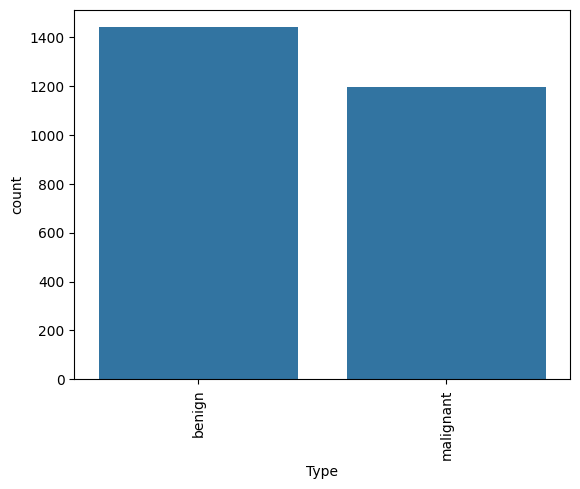

In [9]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [10]:
#balance by deleting extra images (Augmentor API)
#augmentation 
#GAN

In [11]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

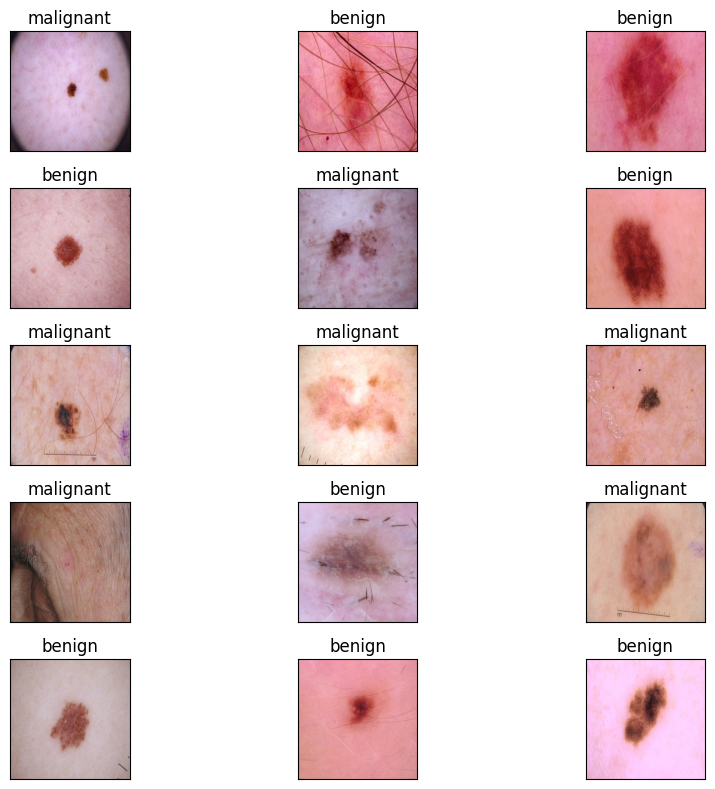

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [13]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [14]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1977 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.


In [15]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [16]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [19]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

Epoch 1/100


C:\Users\ashra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 35s 494ms/step - accuracy: 0.7857 - loss: 0.4897 - val_accuracy: 0.8409 - val_loss: 0.3593
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 32s 510ms/step - accuracy: 0.8709 - loss: 0.2785 - val_accuracy: 0.8258 - val_loss: 0.3529
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 32s 511ms/step - accuracy: 0.8915 - loss: 0.2404 - val_accuracy: 0.7621 - val_loss: 0.5663
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 32s 511ms/step - accuracy: 0.9136 - loss: 0.2061 - val_accuracy: 0.8561 - val_loss: 0.3447
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 36s 581ms/step - accuracy: 0.9245 - loss: 0.1702 - val_accuracy: 0.8167 - val_loss: 0.4284
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 33s 528ms/step - accuracy: 0.9506 - loss: 0.1200 - val_accuracy: 0.8515 - val_loss: 0.3738
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 33s 527ms/step - accuracy: 0.9681 - loss: 0.0911 - val_accuracy: 0.8485 - val_loss: 0.4596
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 34s 550ms/step - accuracy: 0.9624 - loss: 0.0898 - val_accuracy

Epoch 58/100
62/62 [==============================] - 94s 2s/step - loss: 2.4099e-05 - accuracy: 1.0000 - val_loss: 1.1526 - val_accuracy: 0.8500
Epoch 59/100
62/62 [==============================] - 95s 2s/step - loss: 2.2690e-05 - accuracy: 1.0000 - val_loss: 1.1572 - val_accuracy: 0.8561
Epoch 60/100
62/62 [==============================] - 94s 2s/step - loss: 2.1387e-05 - accuracy: 1.0000 - val_loss: 1.1648 - val_accuracy: 0.8515
Epoch 61/100
62/62 [==============================] - 93s 1s/step - loss: 1.9899e-05 - accuracy: 1.0000 - val_loss: 1.1689 - val_accuracy: 0.8545
Epoch 62/100
62/62 [==============================] - 95s 2s/step - loss: 1.9133e-05 - accuracy: 1.0000 - val_loss: 1.1807 - val_accuracy: 0.8500
Epoch 63/100
62/62 [==============================] - 95s 2s/step - loss: 1.8030e-05 - accuracy: 1.0000 - val_loss: 1.1832 - val_accuracy: 0.8545
Epoch 64/100
62/62 [==============================] - 94s 2s/step - loss: 1.6882e-05 - accuracy: 1.0000 - val_loss: 1.1928 -

In [21]:
model.save("model_resnet50.h5")  

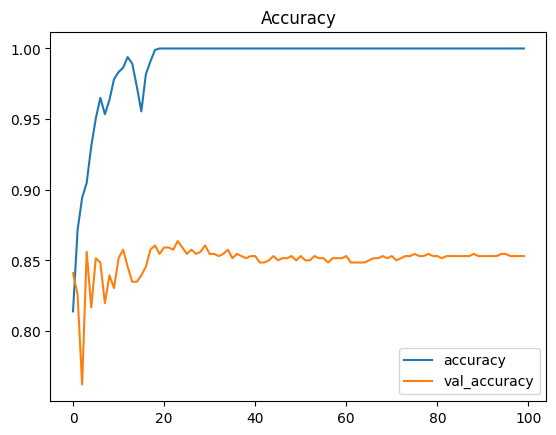

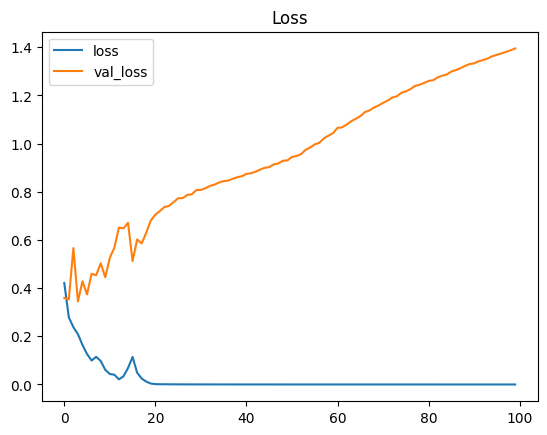

In [22]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [23]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

C:\Users\ashra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


    Test Loss: 1.39479
Test Accuracy: 85.30%


In [24]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 536ms/step


In [25]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      benign       0.86      0.88      0.87       364
   malignant       0.85      0.82      0.83       296

    accuracy                           0.85       660
   macro avg       0.85      0.85      0.85       660
weighted avg       0.85      0.85      0.85       660



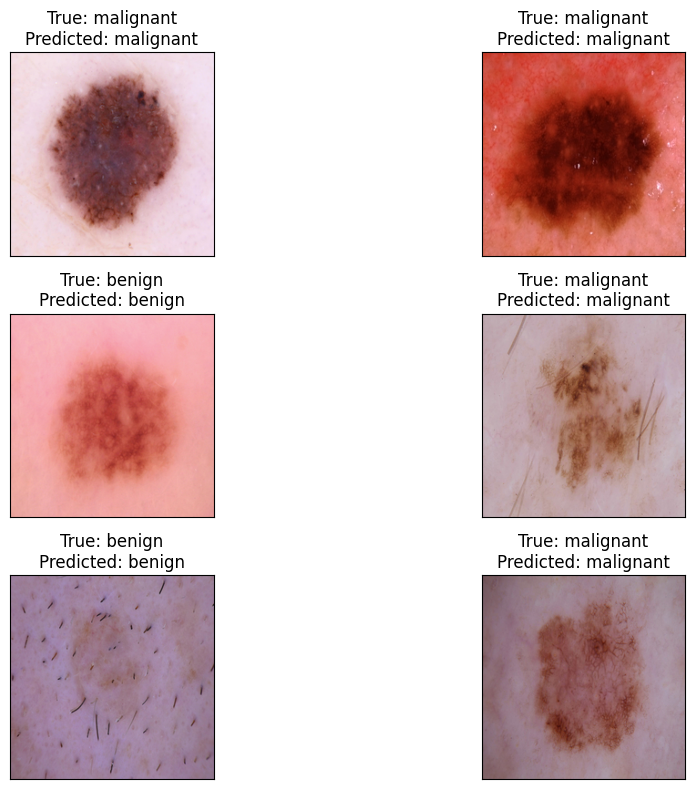

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Your image path
img_path = 'archive (2)/test/benign/1.jpg'

# Load and preprocess image to match model input (100x100x3)
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Only if your model was trained this way

# Predict
result = model.predict(img_array)
print("Prediction:", (result * 100).astype('int'))
print('Input image shape:', img_array.shape)

# Display the image
original_image = plt.imread(img_path)
plt.imshow(original_image)
plt.axis('off')
plt.title('Input Image')
plt.show()


NameError: name 'model' is not defined

In [3]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("model_resnet50.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [4]:
import cv2
import numpy as np
import os
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import load_model

# Replace with your actual model
# loaded_model_imageNet = load_model("your_model.h5")

img_path = 'archive (2)/test/benign/1.jpg'

# Check if image exists
if not os.path.exists(img_path):
    raise FileNotFoundError(f"Image not found: {img_path}")

# Load and preprocess image
img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)

# Choose correct preprocessing
x = preprocess_input(x)  # If model trained with ImageNet normalization
# OR use this if model trained on raw pixel values:
# x = x / 255.0

# Predict
result = loaded_model_imageNet.predict(x)
print("Prediction (%):", (result * 100).astype('int'))


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction (%): [[100   0]]


In [5]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[100, 0]


In [6]:
print("Largest element is:", max(pp))

Largest element is: 100


In [7]:
index = pp.index(max(pp))

In [8]:
name_class=['benign', 'Melignant']

In [9]:
name_class[index]

'benign'

In [10]:
plt.imread(img_path)

array([[[177, 140, 148],
        [190, 151, 156],
        [188, 152, 154],
        ...,
        [192, 156, 160],
        [188, 156, 159],
        [185, 153, 158]],

       [[198, 156, 160],
        [213, 168, 171],
        [211, 169, 171],
        ...,
        [215, 174, 178],
        [214, 173, 177],
        [213, 168, 171]],

       [[193, 152, 158],
        [208, 166, 168],
        [207, 166, 170],
        ...,
        [210, 175, 179],
        [209, 170, 175],
        [209, 166, 175]],

       ...,

       [[189, 157, 160],
        [207, 171, 171],
        [207, 173, 171],
        ...,
        [213, 177, 177],
        [214, 175, 176],
        [211, 171, 172]],

       [[188, 158, 160],
        [208, 169, 172],
        [207, 171, 171],
        ...,
        [215, 175, 175],
        [211, 171, 172],
        [210, 170, 171]],

       [[187, 155, 160],
        [205, 169, 171],
        [206, 172, 171],
        ...,
        [215, 175, 173],
        [211, 170, 174],
        [211, 169, 173]]

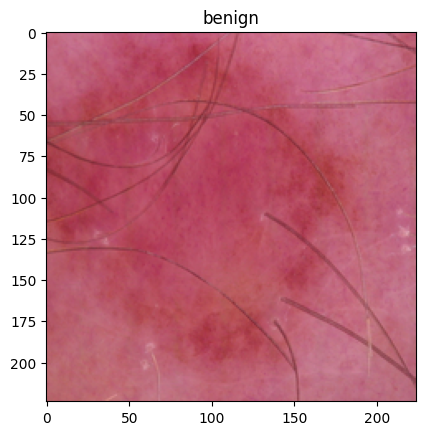

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.title(name_class[index])
plt.show()